In [295]:
import pandas as pd

In [296]:
bom_movies = pd.read_csv('bom.movie_gross.csv', index_col=0)

In [297]:
bom_movies.dropna(inplace=True)

In [298]:
rt_reviews = pd.read_csv("rt.reviews.tsv", sep = '\t', encoding='windows-1252')

In [299]:
rt_movies = pd.read_csv("rt.movie_info.tsv", sep = '\t', encoding='windows-1252')

In [300]:
rt_movies.dropna(inplace=True)

In [301]:
tmdb = pd.read_csv('tmdb.movies.csv', index_col=7)

In [302]:
tn = pd.read_csv('tn.movie_budgets.csv', index_col=2)

In [303]:
rt_movies['box_office'] = rt_movies['box_office'].str.replace(',', '')
rt_movies['box_office'] = rt_movies['box_office'].astype(int)

In [304]:
bom_movies

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.0,652000000,2010
Alice in Wonderland (2010),BV,334200000.0,691300000,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
Inception,WB,292600000.0,535700000,2010
Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...
I Still See You,LGF,1400.0,1500000,2018
The Catcher Was a Spy,IFC,725000.0,229000,2018
Time Freak,Grindstone,10000.0,256000,2018


# Merge bom_movies and tmdb files into one dataframe

In [305]:
df = pd.merge(bom_movies, tmdb, on = 'title')

In [306]:
tmdb

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,vote_average,vote_count
title,,,,,,,,,
Harry Potter and the Deathly Hallows: Part 1,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,7.7,10788
How to Train Your Dragon,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,7.7,7610
Iron Man 2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,6.8,12368
Toy Story,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,7.9,10174
Inception,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,8.3,22186
...,...,...,...,...,...,...,...,...,...
Laboratory Conditions,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,0.0,1
_EXHIBIT_84xxx_,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,0.0,1
The Last One,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,0.0,1


# Select 'studio', 'domestic_gross', 'foreign_gross', 'year', 'popularity', 'vote_average' from the newly formed dataframe

In [307]:
df1 = df[['studio', 'domestic_gross', 'foreign_gross', 'year', 'popularity', 'vote_average']]

In [308]:
df1.reset_index()

,title,studio,domestic_gross,foreign_gross,year,popularity,vote_average
0,Toy Story 3,BV,415000000.0,652000000,2010,24.445,7.7
1,Inception,WB,292600000.0,535700000,2010,27.920,8.3
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,15.041,6.1
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,20.340,6.0
4,Iron Man 2,Par.,312400000.0,311500000,2010,28.515,6.8
...,...,...,...,...,...,...,...
1696,Bilal: A New Breed of Hero,VE,491000.0,1700000,2018,2.707,6.8
1697,I Still See You,LGF,1400.0,1500000,2018,12.867,6.8
1698,The Catcher Was a Spy,IFC,725000.0,229000,2018,9.727,6.2
1699,Time Freak,Grindstone,10000.0,256000,2018,1.604,6.9


In [309]:
tn

,id,release_date,production_budget,domestic_gross,worldwide_gross
movie,,,,,
Avatar,1,"Dec 18, 2009","$425,000,000","$760,507,625","$2,776,345,279"
Pirates of the Caribbean: On Stranger Tides,2,"May 20, 2011","$410,600,000","$241,063,875","$1,045,663,875"
Dark Phoenix,3,"Jun 7, 2019","$350,000,000","$42,762,350","$149,762,350"
Avengers: Age of Ultron,4,"May 1, 2015","$330,600,000","$459,005,868","$1,403,013,963"
Star Wars Ep. VIII: The Last Jedi,5,"Dec 15, 2017","$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...
Red 11,78,"Dec 31, 2018","$7,000",$0,$0
Following,79,"Apr 2, 1999","$6,000","$48,482","$240,495"
Return to the Land of Wonders,80,"Jul 13, 2005","$5,000","$1,338","$1,338"


In [310]:
df1

,studio,domestic_gross,foreign_gross,year,popularity,vote_average
title,,,,,,
Toy Story 3,BV,415000000.0,652000000,2010,24.445,7.7
Inception,WB,292600000.0,535700000,2010,27.920,8.3
Shrek Forever After,P/DW,238700000.0,513900000,2010,15.041,6.1
The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,20.340,6.0
Iron Man 2,Par.,312400000.0,311500000,2010,28.515,6.8
...,...,...,...,...,...,...
Bilal: A New Breed of Hero,VE,491000.0,1700000,2018,2.707,6.8
I Still See You,LGF,1400.0,1500000,2018,12.867,6.8
The Catcher Was a Spy,IFC,725000.0,229000,2018,9.727,6.2


In [311]:
type(df1)

pandas.core.frame.DataFrame

In [312]:
type(tn)

pandas.core.frame.DataFrame

In [313]:
df1.sort_index()

,studio,domestic_gross,foreign_gross,year,popularity,vote_average
title,,,,,,
'71,RAtt.,1300000.0,355000,2015,10.523,6.8
10 Cloverfield Lane,Par.,72100000.0,38100000,2016,17.892,6.9
11-11-11,Rocket,32800.0,5700000,2011,5.196,4.3
12 Strong,WB,45800000.0,21600000,2018,13.183,5.6
12 Years a Slave,FoxS,56700000.0,131100000,2013,16.493,7.9
...,...,...,...,...,...,...
Zero Dark Thirty,Sony,95700000.0,37100000,2012,14.239,6.9
Zookeeper,Sony,80400000.0,89500000,2011,10.764,5.3
Zoolander 2,Par.,28800000.0,27900000,2016,12.997,4.7


In [314]:
tn.index.name = 'title'

In [315]:
tn

,id,release_date,production_budget,domestic_gross,worldwide_gross
title,,,,,
Avatar,1,"Dec 18, 2009","$425,000,000","$760,507,625","$2,776,345,279"
Pirates of the Caribbean: On Stranger Tides,2,"May 20, 2011","$410,600,000","$241,063,875","$1,045,663,875"
Dark Phoenix,3,"Jun 7, 2019","$350,000,000","$42,762,350","$149,762,350"
Avengers: Age of Ultron,4,"May 1, 2015","$330,600,000","$459,005,868","$1,403,013,963"
Star Wars Ep. VIII: The Last Jedi,5,"Dec 15, 2017","$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...
Red 11,78,"Dec 31, 2018","$7,000",$0,$0
Following,79,"Apr 2, 1999","$6,000","$48,482","$240,495"
Return to the Land of Wonders,80,"Jul 13, 2005","$5,000","$1,338","$1,338"


In [316]:
df1

,studio,domestic_gross,foreign_gross,year,popularity,vote_average
title,,,,,,
Toy Story 3,BV,415000000.0,652000000,2010,24.445,7.7
Inception,WB,292600000.0,535700000,2010,27.920,8.3
Shrek Forever After,P/DW,238700000.0,513900000,2010,15.041,6.1
The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,20.340,6.0
Iron Man 2,Par.,312400000.0,311500000,2010,28.515,6.8
...,...,...,...,...,...,...
Bilal: A New Breed of Hero,VE,491000.0,1700000,2018,2.707,6.8
I Still See You,LGF,1400.0,1500000,2018,12.867,6.8
The Catcher Was a Spy,IFC,725000.0,229000,2018,9.727,6.2


# left outer joiner newly formed dataframe with tn dataframe

In [317]:
df4 = df1.merge(tn, on='title', how='left' )

In [318]:
df4.dropna(inplace=True)

In [319]:
df4

,studio,domestic_gross_x,foreign_gross,year,popularity,vote_average,id,release_date,production_budget,domestic_gross_y,worldwide_gross
title,,,,,,,,,,,
Toy Story 3,BV,415000000.0,652000000,2010,24.445,7.7,47.0,"Jun 18, 2010","$200,000,000","$415,004,880","$1,068,879,522"
Inception,WB,292600000.0,535700000,2010,27.920,8.3,38.0,"Jul 16, 2010","$160,000,000","$292,576,195","$835,524,642"
Shrek Forever After,P/DW,238700000.0,513900000,2010,15.041,6.1,27.0,"May 21, 2010","$165,000,000","$238,736,787","$756,244,673"
The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,20.340,6.0,53.0,"Jun 30, 2010","$68,000,000","$300,531,751","$706,102,828"
Iron Man 2,Par.,312400000.0,311500000,2010,28.515,6.8,15.0,"May 7, 2010","$170,000,000","$312,433,331","$621,156,389"
...,...,...,...,...,...,...,...,...,...,...,...
Hotel Artemis,Global Road,6700000.0,6000000,2018,14.585,5.9,15.0,"Jun 8, 2018","$15,000,000","$6,708,137","$12,758,799"
Kin,LGF,5700000.0,4300000,2018,23.805,6.2,88.0,"Aug 31, 2018","$30,000,000","$5,718,096","$10,096,821"
Suspiria,Amazon,2500000.0,5400000,2018,16.925,7.0,81.0,"Oct 26, 2018","$20,000,000","$2,483,472","$7,034,615"


In [320]:
df4.reset_index()

,title,studio,domestic_gross_x,foreign_gross,year,popularity,vote_average,id,release_date,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000,2010,24.445,7.7,47.0,"Jun 18, 2010","$200,000,000","$415,004,880","$1,068,879,522"
1,Inception,WB,292600000.0,535700000,2010,27.920,8.3,38.0,"Jul 16, 2010","$160,000,000","$292,576,195","$835,524,642"
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,15.041,6.1,27.0,"May 21, 2010","$165,000,000","$238,736,787","$756,244,673"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,20.340,6.0,53.0,"Jun 30, 2010","$68,000,000","$300,531,751","$706,102,828"
4,Iron Man 2,Par.,312400000.0,311500000,2010,28.515,6.8,15.0,"May 7, 2010","$170,000,000","$312,433,331","$621,156,389"
...,...,...,...,...,...,...,...,...,...,...,...,...
1192,Hotel Artemis,Global Road,6700000.0,6000000,2018,14.585,5.9,15.0,"Jun 8, 2018","$15,000,000","$6,708,137","$12,758,799"
1193,Kin,LGF,5700000.0,4300000,2018,23.805,6.2,88.0,"Aug 31, 2018","$30,000,000","$5,718,096","$10,096,821"
1194,Suspiria,Amazon,2500000.0,5400000,2018,16.925,7.0,81.0,"Oct 26, 2018","$20,000,000","$2,483,472","$7,034,615"
1195,Destroyer,Annapurna,1500000.0,4000000,2018,17.815,5.9,5.0,"Dec 25, 2018","$9,000,000","$1,533,324","$3,681,096"


In [321]:
df4.drop(['domestic_gross_x', 'id'], axis = 1, inplace=True)

In [322]:
df4

,studio,foreign_gross,year,popularity,vote_average,release_date,production_budget,domestic_gross_y,worldwide_gross
title,,,,,,,,,
Toy Story 3,BV,652000000,2010,24.445,7.7,"Jun 18, 2010","$200,000,000","$415,004,880","$1,068,879,522"
Inception,WB,535700000,2010,27.920,8.3,"Jul 16, 2010","$160,000,000","$292,576,195","$835,524,642"
Shrek Forever After,P/DW,513900000,2010,15.041,6.1,"May 21, 2010","$165,000,000","$238,736,787","$756,244,673"
The Twilight Saga: Eclipse,Sum.,398000000,2010,20.340,6.0,"Jun 30, 2010","$68,000,000","$300,531,751","$706,102,828"
Iron Man 2,Par.,311500000,2010,28.515,6.8,"May 7, 2010","$170,000,000","$312,433,331","$621,156,389"
...,...,...,...,...,...,...,...,...,...
Hotel Artemis,Global Road,6000000,2018,14.585,5.9,"Jun 8, 2018","$15,000,000","$6,708,137","$12,758,799"
Kin,LGF,4300000,2018,23.805,6.2,"Aug 31, 2018","$30,000,000","$5,718,096","$10,096,821"
Suspiria,Amazon,5400000,2018,16.925,7.0,"Oct 26, 2018","$20,000,000","$2,483,472","$7,034,615"


In [323]:
df4.drop(['release_date'], axis = 1, inplace=True)

In [324]:
df4

,studio,foreign_gross,year,popularity,vote_average,production_budget,domestic_gross_y,worldwide_gross
title,,,,,,,,
Toy Story 3,BV,652000000,2010,24.445,7.7,"$200,000,000","$415,004,880","$1,068,879,522"
Inception,WB,535700000,2010,27.920,8.3,"$160,000,000","$292,576,195","$835,524,642"
Shrek Forever After,P/DW,513900000,2010,15.041,6.1,"$165,000,000","$238,736,787","$756,244,673"
The Twilight Saga: Eclipse,Sum.,398000000,2010,20.340,6.0,"$68,000,000","$300,531,751","$706,102,828"
Iron Man 2,Par.,311500000,2010,28.515,6.8,"$170,000,000","$312,433,331","$621,156,389"
...,...,...,...,...,...,...,...,...
Hotel Artemis,Global Road,6000000,2018,14.585,5.9,"$15,000,000","$6,708,137","$12,758,799"
Kin,LGF,4300000,2018,23.805,6.2,"$30,000,000","$5,718,096","$10,096,821"
Suspiria,Amazon,5400000,2018,16.925,7.0,"$20,000,000","$2,483,472","$7,034,615"


In [325]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1197 entries, Toy Story 3 to Bilal: A New Breed of Hero
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   studio             1197 non-null   object 
 1   foreign_gross      1197 non-null   object 
 2   year               1197 non-null   int64  
 3   popularity         1197 non-null   float64
 4   vote_average       1197 non-null   float64
 5   production_budget  1197 non-null   object 
 6   domestic_gross_y   1197 non-null   object 
 7   worldwide_gross    1197 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 84.2+ KB


In [326]:
df4

,studio,foreign_gross,year,popularity,vote_average,production_budget,domestic_gross_y,worldwide_gross
title,,,,,,,,
Toy Story 3,BV,652000000,2010,24.445,7.7,"$200,000,000","$415,004,880","$1,068,879,522"
Inception,WB,535700000,2010,27.920,8.3,"$160,000,000","$292,576,195","$835,524,642"
Shrek Forever After,P/DW,513900000,2010,15.041,6.1,"$165,000,000","$238,736,787","$756,244,673"
The Twilight Saga: Eclipse,Sum.,398000000,2010,20.340,6.0,"$68,000,000","$300,531,751","$706,102,828"
Iron Man 2,Par.,311500000,2010,28.515,6.8,"$170,000,000","$312,433,331","$621,156,389"
...,...,...,...,...,...,...,...,...
Hotel Artemis,Global Road,6000000,2018,14.585,5.9,"$15,000,000","$6,708,137","$12,758,799"
Kin,LGF,4300000,2018,23.805,6.2,"$30,000,000","$5,718,096","$10,096,821"
Suspiria,Amazon,5400000,2018,16.925,7.0,"$20,000,000","$2,483,472","$7,034,615"


# Format year, production_budget, Domestic_budget and Worldwide_gross

In [327]:
df4.year.astype('int32')

title
Toy Story 3                   2010
Inception                     2010
Shrek Forever After           2010
The Twilight Saga: Eclipse    2010
Iron Man 2                    2010
                              ... 
Hotel Artemis                 2018
Kin                           2018
Suspiria                      2018
Destroyer                     2018
Bilal: A New Breed of Hero    2018
Name: year, Length: 1197, dtype: int32

In [328]:
df4['production_budget'] = df4['production_budget'].str.replace(',', '')
df4['production_budget'] = df4['production_budget'].str.replace('$', '')
df4['production_budget'] = df4['production_budget'].astype(int)

In [329]:
df4['domestic_gross_y'] = df4['domestic_gross_y'].str.replace(',', '')
df4['domestic_gross_y'] = df4['domestic_gross_y'].str.replace('$', '')
df4['domestic_gross_y'] = df4['domestic_gross_y'].astype(int)

In [330]:
df4['worldwide_gross'] = df4['worldwide_gross'].str.replace(',', '')
df4['worldwide_gross'] = df4['worldwide_gross'].str.replace('$', '')
df4['worldwide_gross'] = df4['worldwide_gross'].astype(int)

In [331]:
df4.drop_duplicates(inplace=True)

In [332]:
df4= df4.rename(columns={'domestic_gross_y':'domestic_gross'})

In [333]:
df4 = df4.reset_index()

In [334]:
df4

,title,studio,foreign_gross,year,popularity,vote_average,production_budget,domestic_gross,worldwide_gross
0,Toy Story 3,BV,652000000,2010,24.445,7.7,200000000,415004880,1068879522
1,Inception,WB,535700000,2010,27.920,8.3,160000000,292576195,835524642
2,Shrek Forever After,P/DW,513900000,2010,15.041,6.1,165000000,238736787,756244673
3,The Twilight Saga: Eclipse,Sum.,398000000,2010,20.340,6.0,68000000,300531751,706102828
4,Iron Man 2,Par.,311500000,2010,28.515,6.8,170000000,312433331,621156389
...,...,...,...,...,...,...,...,...,...
1089,Hotel Artemis,Global Road,6000000,2018,14.585,5.9,15000000,6708137,12758799
1090,Kin,LGF,4300000,2018,23.805,6.2,30000000,5718096,10096821
1091,Suspiria,Amazon,5400000,2018,16.925,7.0,20000000,2483472,7034615
1092,Destroyer,Annapurna,4000000,2018,17.815,5.9,9000000,1533324,3681096


In [335]:
df4.sort_values(by=['worldwide_gross'], ascending=False)

,title,studio,foreign_gross,year,popularity,vote_average,production_budget,domestic_gross,worldwide_gross
1001,Avengers: Infinity War,BV,"1,369.5",2018,80.773,8.3,300000000,678815482,2048134200
663,Jurassic World,Uni.,"1,019.4",2015,20.709,6.6,215000000,652270625,1648854864
664,Furious 7,Uni.,"1,163.0",2015,20.396,7.3,190000000,353007020,1518722794
665,Avengers: Age of Ultron,BV,946400000,2015,44.383,7.3,330600000,459005868,1403013963
1003,Black Panther,BV,646900000,2018,44.140,7.4,200000000,700059566,1348258224
...,...,...,...,...,...,...,...,...,...
661,Jackpot,DR,1100000,2014,0.600,6.0,400000,44452,44452
662,Jackpot,DR,1100000,2014,2.864,6.1,400000,44452,44452
550,Mr. Nobody,Magn.,3500000,2013,17.242,7.9,46500000,3622,22254
289,Point Blank,Magn.,8500000,2011,6.021,6.6,3000000,0,0


# Create a colum titled returns which is worldwide_gross divided by production_budget

In [336]:
df4['returns'] = df4['worldwide_gross']/df4['production_budget']

In [337]:
df4

,title,studio,foreign_gross,year,popularity,vote_average,production_budget,domestic_gross,worldwide_gross,returns
0,Toy Story 3,BV,652000000,2010,24.445,7.7,200000000,415004880,1068879522,5.344398
1,Inception,WB,535700000,2010,27.920,8.3,160000000,292576195,835524642,5.222029
2,Shrek Forever After,P/DW,513900000,2010,15.041,6.1,165000000,238736787,756244673,4.583301
3,The Twilight Saga: Eclipse,Sum.,398000000,2010,20.340,6.0,68000000,300531751,706102828,10.383865
4,Iron Man 2,Par.,311500000,2010,28.515,6.8,170000000,312433331,621156389,3.653861
...,...,...,...,...,...,...,...,...,...,...
1089,Hotel Artemis,Global Road,6000000,2018,14.585,5.9,15000000,6708137,12758799,0.850587
1090,Kin,LGF,4300000,2018,23.805,6.2,30000000,5718096,10096821,0.336561
1091,Suspiria,Amazon,5400000,2018,16.925,7.0,20000000,2483472,7034615,0.351731
1092,Destroyer,Annapurna,4000000,2018,17.815,5.9,9000000,1533324,3681096,0.409011


In [338]:
df4.sort_values(by=['worldwide_gross'], ascending=False).head(20)

,title,studio,foreign_gross,year,popularity,vote_average,production_budget,domestic_gross,worldwide_gross,returns
1001,Avengers: Infinity War,BV,"1,369.5",2018,80.773,8.3,300000000,678815482,2048134200,6.827114
663,Jurassic World,Uni.,"1,019.4",2015,20.709,6.6,215000000,652270625,1648854864,7.669092
664,Furious 7,Uni.,"1,163.0",2015,20.396,7.3,190000000,353007020,1518722794,7.993278
665,Avengers: Age of Ultron,BV,946400000,2015,44.383,7.3,330600000,459005868,1403013963,4.243841
1003,Black Panther,BV,646900000,2018,44.140,7.4,200000000,700059566,1348258224,6.741291
1002,Black Panther,BV,646900000,2018,2.058,5.1,200000000,700059566,1348258224,6.741291
1004,Jurassic World: Fallen Kingdom,Uni.,891800000,2018,34.958,6.5,170000000,417719760,1305772799,7.681016
434,Frozen,BV,875700000,2013,9.678,5.8,150000000,400738009,1272469910,8.483133
435,Frozen,BV,875700000,2013,26.183,7.3,150000000,400738009,1272469910,8.483133
1005,Incredibles 2,BV,634200000,2018,36.286,7.6,200000000,608581744,1242520711,6.212604


# Filter dataframe 4 by movies that have grossed 400,000,000 dollars or more

In [339]:
df5 = df4[df4['worldwide_gross'] > 400000000]

In [340]:
df4['worldwide_gross'].mean()

179177192.9652651

In [341]:
#179,177,192

In [342]:
df5['studio'] = df5['studio'].replace('^WB.*', 'WB', regex=True)

<ipython-input-342-1f0f1b6a0d1d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['studio'] = df5['studio'].replace('^WB.*', 'WB', regex=True)


In [343]:
df5['studio'] = df5['studio'].replace('^LG.*', 'LG', regex=True)

<ipython-input-343-8fa8652866ac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['studio'] = df5['studio'].replace('^LG.*', 'LG', regex=True)


In [344]:
df5['studio'].value_counts()

BV       35
Fox      24
WB       24
Uni.     17
Sony      9
Par.      8
P/DW      6
LG        5
Wein.     1
Sum.      1
Name: studio, dtype: int64

# Group the new dataframe by studio and average all columns and sort by Worldwide_gross 

In [345]:
df11 = df5.loc[:, df5.columns != 'year'].groupby(by = 'studio').mean().sort_values(by=['worldwide_gross'], ascending=False)

In [346]:
df11

,popularity,vote_average,production_budget,domestic_gross,worldwide_gross,returns
studio,,,,,,
BV,26.877829,7.034286,1.951771e+08,3.401747e+08,9.076144e+08,4.749373
Uni.,18.378824,6.505882,1.161176e+08,2.702187e+08,8.470909e+08,8.771236
Sony,24.655222,6.622222,1.600000e+08,2.430937e+08,7.624474e+08,5.591495
P/DW,15.710000,6.566667,1.583333e+08,2.232683e+08,7.236088e+08,4.533019
WB,27.276292,6.866667,1.735833e+08,2.643226e+08,7.216417e+08,5.080117
Sum.,20.340000,6.000000,6.800000e+07,3.005318e+08,7.061028e+08,10.383865
LG,20.799600,7.200000,1.030000e+08,3.205281e+08,6.769409e+08,9.326640
Par.,27.298625,6.762500,1.742500e+08,2.019279e+08,6.134858e+08,3.567720
Fox,23.185583,6.975000,1.223750e+08,1.724057e+08,5.742631e+08,5.334045


In [347]:
The_five = df11.head(5)[['production_budget', 'worldwide_gross']]

In [348]:
The_five

,production_budget,worldwide_gross
studio,,
BV,1.951771e+08,9.076144e+08
Uni.,1.161176e+08,8.470909e+08
Sony,1.600000e+08,7.624474e+08
P/DW,1.583333e+08,7.236088e+08
WB,1.735833e+08,7.216417e+08


In [349]:
df11[['production_budget', 'worldwide_gross']]

,production_budget,worldwide_gross
studio,,
BV,1.951771e+08,9.076144e+08
Uni.,1.161176e+08,8.470909e+08
Sony,1.600000e+08,7.624474e+08
P/DW,1.583333e+08,7.236088e+08
WB,1.735833e+08,7.216417e+08
Sum.,6.800000e+07,7.061028e+08
LG,1.030000e+08,6.769409e+08
Par.,1.742500e+08,6.134858e+08
Fox,1.223750e+08,5.742631e+08


In [350]:
pie = df5['studio'].value_counts().head(8)

In [351]:
pie

BV      35
Fox     24
WB      24
Uni.    17
Sony     9
Par.     8
P/DW     6
LG       5
Name: studio, dtype: int64

In [352]:
import matplotlib.pyplot as plt
import seaborn

In [353]:
palette_color = seaborn.color_palette('bright')

([<matplotlib.patches.Wedge at 0x22c2e30fd90>,
 [Text(0.7184901272491546, 0.8329297311571331, 'BV'),
  Text(-0.7387148503317204, 0.8150462378904549, 'Fox'),
  Text(-1.035698471701323, -0.37057883873144215, 'WB'),
  Text(-0.24101136417255714, -1.0732723430423814, 'Uni.'),
  Text(0.44576544540548907, -1.0056307312738837, 'Sony'),
  Text(0.8150462378904548, -0.7387148503317206, 'Par.'),
  Text(1.0162674857624152, -0.42095177560159946, 'P/DW'),
  Text(1.091727488058581, -0.13465174271913763, 'LG')],
 [Text(0.39190370577226613, 0.4543253079038907, '27%'),
  Text(-0.4029353729082111, 0.4445706752129754, '19%'),
  Text(-0.5649264391098124, -0.20213391203533207, '19%'),
  Text(-0.13146074409412206, -0.585421278023117, '13%'),
  Text(0.243144788402994, -0.5485258534221183, '7%'),
  Text(0.44457067521297533, -0.4029353729082112, '6%'),
  Text(0.5543277195067718, -0.2296100594190542, '5%'),
  Text(0.595487720759226, -0.07344640511952961, '4%')])

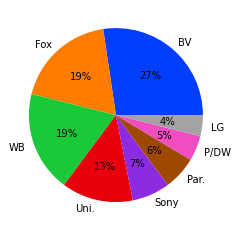

In [354]:
plt.pie(pie.values, labels=pie.keys(), colors=palette_color, autopct='%.0f%%')

In [355]:
x = df5['studio'].unique()

In [356]:
df5

,title,studio,foreign_gross,year,popularity,vote_average,production_budget,domestic_gross,worldwide_gross,returns
0,Toy Story 3,BV,652000000,2010,24.445,7.7,200000000,415004880,1068879522,5.344398
1,Inception,WB,535700000,2010,27.920,8.3,160000000,292576195,835524642,5.222029
2,Shrek Forever After,P/DW,513900000,2010,15.041,6.1,165000000,238736787,756244673,4.583301
3,The Twilight Saga: Eclipse,Sum.,398000000,2010,20.340,6.0,68000000,300531751,706102828,10.383865
4,Iron Man 2,Par.,311500000,2010,28.515,6.8,170000000,312433331,621156389,3.653861
...,...,...,...,...,...,...,...,...,...,...
1010,Ant-Man and the Wasp,BV,406000000,2018,44.729,7.0,130000000,216648740,623144660,4.793420
1011,Ready Player One,WB,445200000,2018,30.029,7.6,150000000,137690172,579290136,3.861934
1012,The Meg,WB,384800000,2018,31.397,5.9,178000000,145443742,529530715,2.974892
1013,Hotel Transylvania 3: Summer Vacation,Sony,361100000,2018,26.815,6.8,65000000,167500092,527079962,8.108922


In [357]:
revenue = df5.loc[:, df5.columns != 'year'].groupby(by = 'studio').mean().sort_values(by=['worldwide_gross'], ascending=False)['worldwide_gross']

In [358]:
expense = df5.loc[:, df5.columns != 'year'].groupby(by = 'studio').mean().sort_values(by=['production_budget'], ascending=False)['production_budget']

In [359]:
revenue

studio
BV       9.076144e+08
Uni.     8.470909e+08
Sony     7.624474e+08
P/DW     7.236088e+08
WB       7.216417e+08
Sum.     7.061028e+08
LG       6.769409e+08
Par.     6.134858e+08
Fox      5.742631e+08
Wein.    4.499483e+08
Name: worldwide_gross, dtype: float64

In [360]:
expense

studio
BV       1.951771e+08
Par.     1.742500e+08
WB       1.735833e+08
Sony     1.600000e+08
P/DW     1.583333e+08
Fox      1.223750e+08
Uni.     1.161176e+08
LG       1.030000e+08
Wein.    1.000000e+08
Sum.     6.800000e+07
Name: production_budget, dtype: float64

In [361]:
df20

,production_budget,worldwide_gross
studio,,
BV,1.951771e+08,9.076144e+08
Par.,1.742500e+08,6.134858e+08
WB,1.735833e+08,7.216417e+08
Sony,1.600000e+08,7.624474e+08
P/DW,1.583333e+08,7.236088e+08
Fox,1.223750e+08,5.742631e+08
Uni.,1.161176e+08,8.470909e+08
LG,1.030000e+08,6.769409e+08
Wein.,1.000000e+08,4.499483e+08


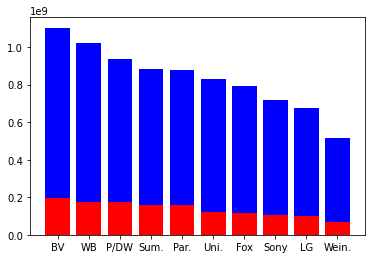

In [362]:
plt.bar(x, expense, color='r')
plt.bar(x, revenue, bottom=expense, color='b')
plt.show()

In [363]:
df6 = df4[df4['worldwide_gross'] < 600000000]

In [364]:
df6['returns'].mean()

4.8319163644113585

In [365]:
df5['studio'].unique()

array(['BV', 'WB', 'P/DW', 'Sum.', 'Par.', 'Uni.', 'Fox', 'Sony', 'LG',
       'Wein.'], dtype=object)

In [366]:
df10 = df5[df5['studio']== 'WB (NL)']

In [367]:
rt_movies

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000,108 minutes,Entertainment One
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,41032915,82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,224114,123 minutes,Sony Pictures Classics
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"Dec 17, 2010","Apr 5, 2011",$,1039869,108 minutes,ATO Pictures
18,25,"From ancient Japan's most enduring tale, the e...",PG-13,Action and Adventure|Drama|Science Fiction and...,Carl Erik Rinsch,Chris Morgan|Hossein Amini,"Dec 25, 2013","Apr 1, 2014",$,20518224,127 minutes,Universal Pictures
...,...,...,...,...,...,...,...,...,...,...,...,...
1530,1968,"This holiday season, acclaimed filmmaker Camer...",PG,Comedy|Drama,Cameron Crowe,Aline Brosh McKenna|Cameron Crowe,"Dec 23, 2011","Apr 3, 2012",$,72700000,126 minutes,20th Century Fox
1537,1976,"Embrace of the Serpent features the encounter,...",NR,Action and Adventure|Art House and International,Ciro Guerra,Ciro Guerra|Jacques Toulemonde Vidal,"Feb 17, 2016","Jun 21, 2016",$,1320005,123 minutes,Buffalo Films
1541,1980,A band of renegades on the run in outer space ...,PG-13,Action and Adventure|Science Fiction and Fantasy,Joss Whedon,Joss Whedon,"Sep 30, 2005","Dec 20, 2005",$,25335935,119 minutes,Universal Pictures
1542,1981,"Money, Fame and the Knowledge of English. In I...",NR,Comedy|Drama,Gauri Shinde,Gauri Shinde,"Oct 5, 2012","Nov 20, 2012",$,1416189,129 minutes,Eros Entertainment


In [368]:
ratings = rt_movies.groupby(by='rating').mean().sort_values(by=['box_office'], ascending=False)

In [369]:
ratings.drop(['id'], inplace=True, axis = 1)

In [370]:
ratings.reset_index(inplace=True)

In [371]:
ratings

,rating,box_office
0,PG-13,6.872359e+07
1,PG,5.289280e+07
2,R,2.394827e+07
3,G,7.402788e+06
4,NC17,1.260219e+06
5,NR,6.376923e+05


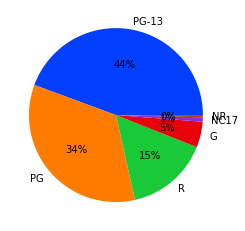

In [372]:
pie2 = plt.pie(ratings.box_office, labels=ratings.rating, colors=palette_color, autopct='%.0f%%')

In [373]:
ratings.rating

0    PG-13
1       PG
2        R
3        G
4     NC17
5       NR
Name: rating, dtype: object

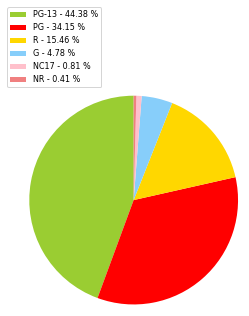

In [374]:
x = ratings.rating
y = ratings.box_office
colors = ['yellowgreen','red','gold','lightskyblue','pink','lightcoral']
porcent = 100.*y/y.sum()

patches, texts = plt.pie(y, colors=colors, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='lower left', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)

In [375]:
rt_movies['theater_date'] = pd.to_datetime(rt_movies['theater_date'])

In [376]:
rt_movies['theater_date'].sort_values()

691    1974-12-25
913    1993-10-24
1208   2000-07-26
160    2000-09-23
1121   2000-10-06
          ...    
1035   2017-05-12
1088   2017-06-09
492    2017-07-28
1187   2017-08-18
605    2017-12-01
Name: theater_date, Length: 235, dtype: datetime64[ns]

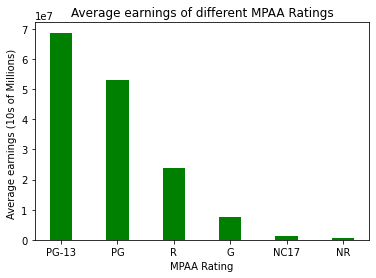

In [377]:
plt.bar(x, y, color ='green',
        width = 0.4)
 
plt.xlabel("MPAA Rating")
plt.ylabel("Average earnings (10s of Millions) ")
plt.title("Average earnings of different MPAA Ratings")
plt.show()

In [378]:
x

0    PG-13
1       PG
2        R
3        G
4     NC17
5       NR
Name: rating, dtype: object

In [379]:
import numpy as np

In [380]:
rt_movies['runtime'] = rt_movies['runtime'].str[:-8].astype(int)

In [381]:
rt_movies['runtime'].mean()

106.66382978723404

In [382]:
rt_movies['long'] = np.where(rt_movies['runtime']> 107, 'Y', 'N')

In [383]:
rt_movies[rt_movies['long'] == 'N']

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,long
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,2002-01-11,"Jun 18, 2002",$,41032915,82,Paramount Pictures,N
19,26,A comic series of short vignettes build on one...,R,Art House and International|Comedy|Drama|Music...,Jim Jarmusch,Jim Jarmusch,2004-05-14,"Sep 21, 2004",$,1971135,96,MGM,N
29,41,"Ken Loach directs Sweet Sixteen, a gritty dram...",R,Drama,Ken Loach,Paul Laverty,2003-05-16,"Oct 7, 2003",$,201010,106,Lions Gate Films,N
48,61,Death once again shows he's determined to get ...,R,Action and Adventure|Drama|Horror|Mystery and ...,James Wong,James Wong|Glen Morgan,2006-02-10,"Jul 25, 2006",$,54100000,93,New Line Cinema,N
61,77,"Until he was downsized, affable, amiable Larry...",PG-13,Comedy|Drama,Tom Hanks,Tom Hanks|Nia Vardalos,2011-07-01,"Nov 15, 2011",$,35565975,99,Universal Pictures,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1506,1940,The debut project from co-star Michael Douglas...,R,Comedy,Harald Zwart,"Stan Seidel|Stanford Clarke ""Stan"" Seidel",2001-04-27,"Oct 9, 2001",$,5689784,93,USA Films,N
1511,1945,"Left on a nun's doorstep, Larry, Curly and Moe...",PG,Comedy,Bobby Farrelly|Peter Farrelly,Bobby Farrelly|Peter Farrelly|Mike Cerrone,2012-04-13,"Jul 17, 2012",$,41800000,92,20th Century Fox,N
1518,1953,A glimpse into the comedic process and private...,R,Comedy|Documentary|Television,Ricki Stern|Anne Sundberg,Ricki Stern,2010-06-11,"Dec 14, 2010",$,2927972,84,IFC Films,N
1528,1965,"Because of a misunderstanding on his part, Cli...",G,Animation|Kids and Family,Robert Ramirez,Robert Ramirez|Rhett Reese,2004-04-23,"Aug 24, 2004",$,2782548,73,Warner Bros. Pictures,N


In [384]:
long = rt_movies[['box_office', 'rating', 'long']].groupby(by = 'long').mean()

In [385]:
long.reset_index(inplace=True)

In [386]:
long

,long,box_office
0,N,2.957152e+07
1,Y,5.677635e+07


In [387]:
y = long.box_office

In [388]:
x = long.long

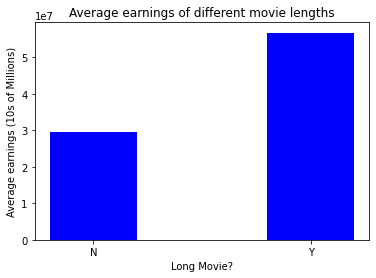

In [389]:
plt.bar(x, y, color ='blue',
        width = 0.4)
 
plt.xlabel("Long Movie?")
plt.ylabel("Average earnings (10s of Millions)")
plt.title("Average earnings of different movie lengths")
plt.show()

In [390]:
tn

,id,release_date,production_budget,domestic_gross,worldwide_gross
title,,,,,
Avatar,1,"Dec 18, 2009","$425,000,000","$760,507,625","$2,776,345,279"
Pirates of the Caribbean: On Stranger Tides,2,"May 20, 2011","$410,600,000","$241,063,875","$1,045,663,875"
Dark Phoenix,3,"Jun 7, 2019","$350,000,000","$42,762,350","$149,762,350"
Avengers: Age of Ultron,4,"May 1, 2015","$330,600,000","$459,005,868","$1,403,013,963"
Star Wars Ep. VIII: The Last Jedi,5,"Dec 15, 2017","$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...
Red 11,78,"Dec 31, 2018","$7,000",$0,$0
Following,79,"Apr 2, 1999","$6,000","$48,482","$240,495"
Return to the Land of Wonders,80,"Jul 13, 2005","$5,000","$1,338","$1,338"
